In [1]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
## Dingyi Kang
## A20308046
## Assignment4 - problem 2

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from google.colab import drive

import graphviz
from sklearn.tree import export_graphviz

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# extract the training data into pandasframe
trainData = pd.read_excel("/content/drive/My Drive/Asssignment4_Data.xlsx", sheet_name="Train")
feature_cols = ['Local Price', 'Bathrooms', 'Land Area', 'Living area','# Garages','# Rooms','# Bedrooms', 'Age of home']
xTrain = trainData[feature_cols] # Features
yTrain = trainData['Construction type']
#trainData

In [5]:
# extract the testing data into pandasframe
testData = pd.read_excel("/content/drive/My Drive/Asssignment4_Data.xlsx", sheet_name="Test")
xTest = testData[feature_cols] # Features
yTest = testData['Construction type']
#print(xTest)
#print(yTest)

In [6]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(xTrain, yTrain)

#Predict the response for test dataset
y_pred_train = classifier.predict(xTrain)

#Predict the response for test dataset
y_pred = classifier.predict(xTest)

maxDepth = classifier.get_depth()
print("Maximum Depth of this decision tree is " + str(maxDepth))

Maximum Depth of this decision tree is 5


In [7]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(yTrain, y_pred_train))

Accuracy: 1.0


## Answer to question 1a: the accuracy on training dataset is 100%

In [8]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.4


## Answer to question 1b: the accuracy on training dataset is 40%

In [9]:
def accuracyOfDecisionTreeWithMaxDepth(max_depth):
  # Create Decision Tree classifer object with custom max_depth
  clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depth)

  # Train Decision Tree Classifer
  clf = clf.fit(xTrain,yTrain)

  #Predict the response for test dataset
  y_pred = clf.predict(xTest)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", metrics.accuracy_score(yTest, y_pred))
  return metrics.accuracy_score(yTest, y_pred)

Accuracy: 0.4
Accuracy: 0.8
Accuracy: 0.6
Accuracy: 0.6
Accuracy: 0.6


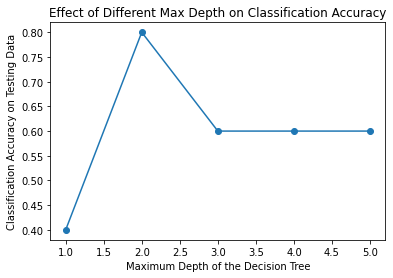

In [10]:

depthArr = list(range(1,maxDepth+1))
accuracyArr = []
for i in depthArr:
  accuracyArr.append(accuracyOfDecisionTreeWithMaxDepth(i))

plt.xlabel("Maximum Depth of the Decision Tree")
plt.ylabel('Classification Accuracy on Testing Data')
plt.title("Effect of Different Max Depth on Classification Accuracy")
plt.scatter(depthArr, accuracyArr)
plt.plot(depthArr, accuracyArr)

## Answer to question 2: relative to the dafault in which nodes are expanded without restriction of maximum depth, restricting the maximum depth of decision tree may improve the classification accuracy by prevent overfitting. 
## As we can see from the result and graph above, the decision tree with maxmimum depth of 2 has the best perfomance with a classification accuracy of 80%

## Answer to question 3: If there is no restriction on maximum depth of the decision tree, the trained decision tree will 100% overfit. The deeper the decision tree grows, the more complex the model will become because it will have more splits and thus captures more information about the data. After training the model without restriction on max depth, the model will fit perfectly for the training dataset and will not be able to generalize well on test dataset. Hence, restricting the maximum depth of the decision tree, as an apprarent effective approach preventing decision trees from growing too deep,  can effectively prevent the model from being overfitting and thus improve the performance of the classifier.

Accuracy: 0.8


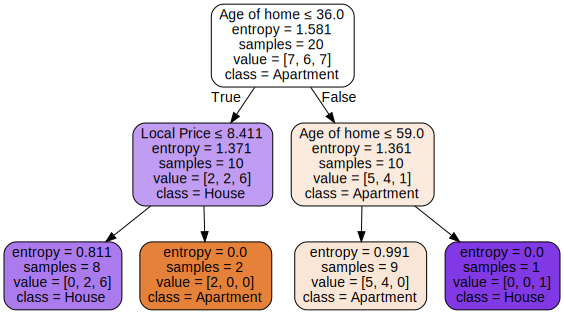

In [11]:
# Create Decision Tree classifer object with custom max_depth
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(xTrain,yTrain)

#Predict the response for test dataset
y_pred = clf.predict(xTest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))


dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Apartment','Condo', 'House'])
graph = graphviz.Source(dot_data)  
graph



## Answer to question 4:
## For the pruned decision tree above which has a max depth of 2, 
## Inference rule of this tree:
## 1. determine if the age of home is less than or equal to 36.0
## 2. if it is less than or equal to 36.0, then next determine if local price is less than or equal to 8.411. If it is, then this example belongs to class House. Or, it belongs to class Apartment
## 3. if its home age is greater than 36, then next deterimine if home age is less than or eaul to 59.0. If it is, this example belongs to class Apartment. Or, it belongs to class House.

## Inference for the classification of the given example based on this tree:
## 1. given its home age is 23 which is less than 36.0, we go to left branch of the root
## 2. given its local price is 9.0384 which is greater than 8.411, we goes to the right branch of this current node, which makes us arrive a leaf, and we can thus classifiy this example as an Apartment.

Accuracy: 0.6


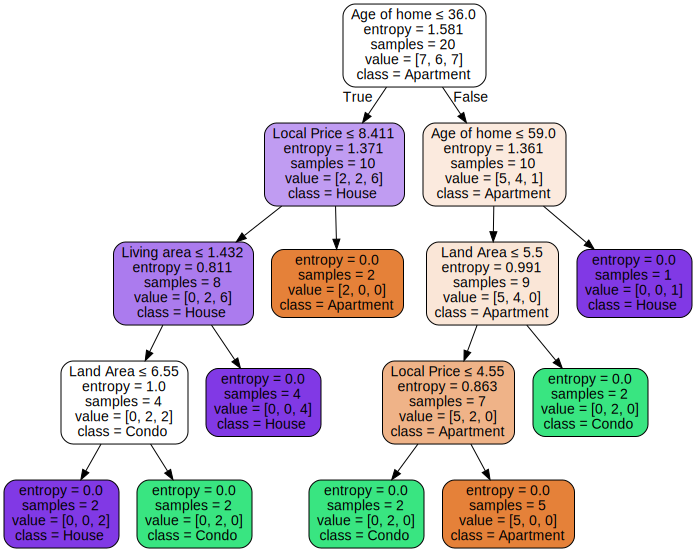

In [12]:
# Create Decision Tree classifer object with custom max_depth
clf = DecisionTreeClassifier(criterion="entropy", splitter="best")

# Train Decision Tree Classifer
clf = clf.fit(xTrain,yTrain)

#Predict the response for test dataset
y_pred = clf.predict(xTest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(yTest, y_pred))

dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Apartment','Condo', 'House'])
graph = graphviz.Source(dot_data)  
graph

## Answer to question 4:
## For the unpruned decision tree above, 
## Inference for the classification of the given example based on this tree:
## 1. given its home age is 23 which is less than 36.0, we go to left branch of the root node
## 2. given its local price is 9.0384 which is greater than 8.411, we goes to the right branch of this current node, which makes us arrive a leaf, and thus we can classifiy this example as an Apartment.